<a href="https://colab.research.google.com/github/Alifsyam/Alifsyam1/blob/master/Domain%20frekuensi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def apply_low_pass_filter(image_path):
    # Membaca dan mengkonversi citra ke grayscale
    image = cv2.imread(image_path, 0)

    # Menghitung DFT (Discrete Fourier Transform)
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Membuat mask untuk filter low-pass
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    mask = np.zeros((rows, cols, 2), np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 1

    # Menerapkan mask dan inverse DFT
    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    # Menampilkan citra
    plt.figure(figsize=(12, 6))
    plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_back, cmap='gray'), plt.title('Low-Pass Filtered Image')
    plt.xticks([]), plt.yticks([])
    plt.show()

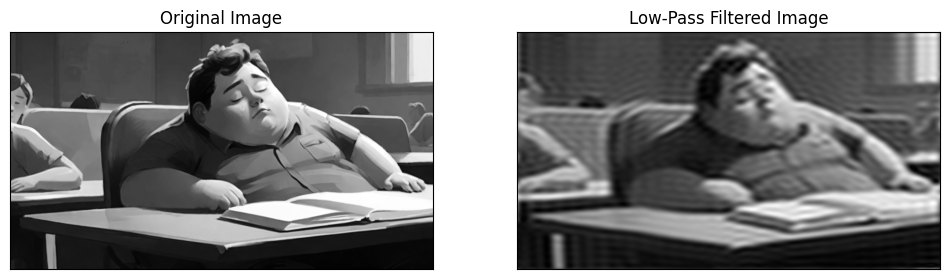

In [3]:
apply_low_pass_filter('/content/drive/MyDrive/Leonardo_Diffusion_XL_draw_me_a_picture_of_a_fat_kid_sleeping_1.jpg')